# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt
import pandas as pd
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reading data and pre-processing

In [3]:
def read_data(file_name):
    # loading csv
    df = pd.read_csv(file_name)
    
    # removing unnamed columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    return df

In [4]:
# loading csv
df_general = read_data('predictions/train_predictions_general.csv')

df_gk = read_data('predictions/train_predictions_gk.csv')
df_def = read_data('predictions/train_predictions_def.csv')
df_mid = read_data('predictions/train_predictions_mid.csv')
df_fwd = read_data('predictions/train_predictions_fwd.csv')

# Choosing features and splitting data

In [5]:
features = ["Points", "Was Home", "Opp rating", 'ScoreForLast5', 'ScoreAgainstLast5']

# career averages
features += ['MinAvgOverall', 'GlsAvgOverall',
       'AstAvgOverall', 'CrdYAvgOverall', 'CrdRAvgOverall', 'xGAvgOverall',
       'xAGAvgOverall', 'CSAvgOverall', 'Team ScoreAvgOverall',
       'Opp ScoreAvgOverall', 'FPLAvgOverall']

info = ["Name", "GW", "Squad", "Opponent", "Was Home", "Opp rating"]
to_predict = ["Total Points"]

In [6]:
START_GAMEWEEK = 8
GAMEWEEK_TO_PREDICT = 19

In [7]:
def split_data(df, start_gw, gw_to_predict, features, to_predict):
    # potential problem with rescheduled gameweeks
    X_train = df[(df["GW"] >= start_gw) & (df["GW"] <= gw_to_predict - 1)][features]
    y_train = df[(df["GW"] >= start_gw) & (df["GW"] <= gw_to_predict - 1)][to_predict]
    
    X_test = df[df["GW"] == gw_to_predict][features]
    y_test = df[df["GW"] == gw_to_predict][to_predict]
    
    return X_train, y_train, X_test, y_test

In [8]:
# splitting data into train and test
X_train_general, y_train_general, X_test_general, y_test_general = split_data(df_general, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)

X_train_gk, y_train_gk, X_test_gk, y_test_gk = split_data(df_gk, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)
X_train_def, y_train_def, X_test_def, y_test_def = split_data(df_def, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)
X_train_mid, y_train_mid, X_test_mid, y_test_mid = split_data(df_mid, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)
X_train_fwd, y_train_fwd, X_test_fwd, y_test_fwd = split_data(df_fwd, START_GAMEWEEK, GAMEWEEK_TO_PREDICT, features, to_predict)

In [9]:
X_train_general.size, y_train_general.size, X_test_general.size, y_test_general.size

(43488, 2718, 2544, 159)

In [10]:
X_train_gk.size, y_train_gk.size, X_test_gk.size, y_test_gk.size

(4064, 254, 336, 21)

In [11]:
X_train_def.size, y_train_def.size, X_test_def.size, y_test_def.size

(14752, 922, 816, 51)

In [12]:
X_train_mid.size, y_train_mid.size, X_test_mid.size, y_test_mid.size

(19808, 1238, 1088, 68)

In [13]:
X_train_fwd.size, y_train_fwd.size, X_test_fwd.size, y_test_fwd.size

(4864, 304, 304, 19)

# Models

In [14]:
model_general = xgb.XGBRegressor(random_state=42)

model_gk = xgb.XGBRegressor(random_state=42)
model_def = xgb.XGBRegressor(random_state=42)
model_mid = xgb.XGBRegressor(random_state=42)
model_fwd = xgb.XGBRegressor(random_state=42, n_estimators=5000)

# Training

In [15]:
%%time
model_general.fit(X_train_general, y_train_general)

CPU times: total: 1.31 s
Wall time: 253 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [16]:
%%time
model_gk.fit(X_train_gk, y_train_gk)

CPU times: total: 438 ms
Wall time: 99.7 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [17]:
%%time
model_def.fit(X_train_def, y_train_def)

CPU times: total: 906 ms
Wall time: 139 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [18]:
%%time
model_mid.fit(X_train_mid, y_train_mid)

CPU times: total: 984 ms
Wall time: 160 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [19]:
%%time
model_fwd.fit(X_train_fwd, y_train_fwd)

CPU times: total: 12.8 s
Wall time: 2.02 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

# Predictions - general

In [20]:
df_predictions_general = df_general[df_general["GW"] == GAMEWEEK_TO_PREDICT]

df_predictions_gk = df_gk[df_gk["GW"] == GAMEWEEK_TO_PREDICT]
df_predictions_def = df_def[df_def["GW"] == GAMEWEEK_TO_PREDICT]
df_predictions_mid = df_mid[df_mid["GW"] == GAMEWEEK_TO_PREDICT]
df_predictions_fwd = df_fwd[df_fwd["GW"] == GAMEWEEK_TO_PREDICT]

In [21]:
df_predictions_general.shape, df_predictions_gk.shape, df_predictions_def.shape, df_predictions_mid.shape, df_predictions_fwd.shape

((159, 65), (21, 65), (51, 65), (68, 65), (19, 65))

In [22]:
# make predictions on the test data
predictions_general = model_general.predict(X_test_general)

predictions_gk = model_gk.predict(X_test_gk)
predictions_def = model_def.predict(X_test_def)
predictions_mid = model_mid.predict(X_test_mid)
predictions_fwd = model_fwd.predict(X_test_fwd)

In [23]:
len(predictions_general), len(predictions_gk), len(predictions_def), len(predictions_mid), len(predictions_fwd)

(159, 21, 51, 68, 19)

In [24]:
df_predictions_general["pred"] = predictions_general

df_predictions_gk["pred"] = predictions_gk
df_predictions_def["pred"] = predictions_def
df_predictions_mid["pred"] = predictions_mid
df_predictions_fwd["pred"] = predictions_fwd


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [25]:
# model.predict(df[df["GW"] == GAMEWEEK_TO_PREDICT][df["Name"] == "Mohamed-Salah"][features])

# General predictions

In [26]:
df_predictions_general[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
1700,Martinelli,19,Arsenal,Newcastle Utd,1.0,1850.296631,3.0,7.947773
2612,Kieran-Trippier,19,Newcastle Utd,Arsenal,0.0,1934.447754,8.0,7.611839
1162,Erling-Haaland,19,Manchester City,Chelsea,0.0,1879.017578,2.0,7.262319
1874,Aleksandar-Mitrovic,19,Fulham,Leicester City,0.0,1770.339966,5.0,7.087163
759,Gabriel-Dos-Santos,19,Arsenal,Newcastle Utd,1.0,1850.296631,6.0,6.791589
2790,Joe-Willock,19,Newcastle Utd,Arsenal,0.0,1934.447754,3.0,6.717373
1710,Emiliano-Martinez,19,Aston Villa,Wolves,1.0,1686.353516,2.0,6.268852
1008,David-de-Gea,19,Manchester Utd,Bournemouth,1.0,1647.227417,7.0,6.165807
2281,Bukayo-Saka,19,Arsenal,Newcastle Utd,1.0,1850.296631,3.0,6.146214
908,Lukasz-Fabianski,19,West Ham,Leeds United,0.0,1712.961670,2.0,6.119648


# Goalkeepers predictions

In [27]:
df_predictions_gk[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
72,Lukasz-Fabianski,19,West Ham,Leeds United,0.0,1712.961670,2.0,7.830790
182,Robin-Olsen,19,Aston Villa,Wolves,1.0,1686.353516,0.0,5.645921
279,Danny-Ward,19,Leicester City,Fulham,1.0,1705.027588,2.0,4.635196
268,Mark-Travers,19,Bournemouth,Manchester Utd,0.0,1859.299194,2.0,4.462217
150,Hugo-Lloris,19,Tottenham,Crystal Palace,0.0,1753.953369,7.0,3.997334
39,Gavin-Bazunu,19,Southampton,Nott'ham Forest,1.0,1630.994873,2.0,3.821069
203,Nick-Pope,19,Newcastle Utd,Arsenal,0.0,1934.447754,10.0,3.659947
213,Aaron-Ramsdale,19,Arsenal,Newcastle Utd,1.0,1850.296631,6.0,3.607732
95,David-de-Gea,19,Manchester Utd,Bournemouth,1.0,1647.227417,7.0,3.531601
60,Ederson,19,Manchester City,Chelsea,0.0,1879.017578,8.0,3.022395


# Defenders predictions

In [28]:
df_predictions_def[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
856,Kieran-Trippier,19,Newcastle Utd,Arsenal,0.0,1934.447754,8.0,7.616594
308,Gabriel-Dos-Santos,19,Arsenal,Newcastle Utd,1.0,1850.296631,6.0,5.820711
153,Timothy-Castagne,19,Leicester City,Fulham,1.0,1705.027588,1.0,5.095473
719,Fabian-Schar,19,Newcastle Utd,Arsenal,0.0,1934.447754,6.0,5.064702
123,Dan-Burn,19,Newcastle Utd,Arsenal,0.0,1934.447754,6.0,4.836921
105,Sven-Botman,19,Newcastle Utd,Arsenal,0.0,1934.447754,6.0,4.423456
942,Neco-Williams,19,Nott'ham Forest,Southampton,0.0,1658.088989,1.0,4.014647
245,Vladimir-Coufal,19,West Ham,Leeds United,0.0,1712.961670,2.0,3.827811
567,Ben-Mee,19,Brentford,Liverpool,1.0,2006.804077,2.0,3.681330
953,Joe-Worrall,19,Nott'ham Forest,Southampton,0.0,1658.088989,6.0,3.533751


# Midfielders predictions

In [29]:
df_predictions_mid[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
37,Miguel-Almiron,19,Newcastle Utd,Arsenal,0.0,1934.447754,2.0,10.130055
176,Emi-Buendia,19,Aston Villa,Wolves,1.0,1686.353516,2.0,9.600339
1068,Marcus-Rashford,19,Manchester Utd,Bournemouth,1.0,1647.227417,8.0,8.781784
786,Douglas-Luiz,19,Aston Villa,Wolves,1.0,1686.353516,2.0,8.162911
400,Christian-Eriksen,19,Manchester Utd,Bournemouth,1.0,1647.227417,6.0,6.609778
87,Jordan-Ayew,19,Crystal Palace,Tottenham,1.0,1856.231201,2.0,6.578978
686,Joelinton,19,Newcastle Utd,Arsenal,0.0,1934.447754,2.0,6.090399
508,Morgan-Gibbs-White,19,Nott'ham Forest,Southampton,0.0,1658.088989,3.0,5.981933
837,Martinelli,19,Arsenal,Newcastle Utd,1.0,1850.296631,3.0,5.748217
97,Leon-Bailey,19,Aston Villa,Wolves,1.0,1686.353516,2.0,4.857915


# Forwards predictions

In [30]:
df_predictions_fwd[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
162,Harry-Kane,19,Tottenham,Crystal Palace,0.0,1753.953369,16.0,6.816974
106,Erling-Haaland,19,Manchester City,Chelsea,0.0,1879.017578,2.0,6.440082
210,Aleksandar-Mitrovic,19,Fulham,Leicester City,0.0,1770.339966,5.0,6.307339
231,Eddie-Nketiah,19,Arsenal,Newcastle Utd,1.0,1850.296631,1.0,4.638259
302,Ollie-Watkins,19,Aston Villa,Wolves,1.0,1686.353516,2.0,4.540822
140,Danny-Ings,19,Aston Villa,Wolves,1.0,1686.353516,8.0,4.059944
10,Che-Adams,19,Southampton,Nott'ham Forest,1.0,1630.994873,2.0,3.966563
202,Bryan-Mbeumo,19,Brentford,Liverpool,1.0,2006.804077,12.0,3.958171
151,Brennan-Johnson,19,Nott'ham Forest,Southampton,0.0,1658.088989,4.0,2.663280
285,Jamie-Vardy,19,Leicester City,Fulham,1.0,1705.027588,2.0,2.434623


# Positional merged predictions

In [31]:
df_predictions_positional_merged = pd.concat([df_predictions_gk, df_predictions_def, df_predictions_mid, df_predictions_fwd])

In [32]:
df_predictions_positional_merged[info + to_predict + ["pred"]].sort_values(by=["pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,pred
37,Miguel-Almiron,19,Newcastle Utd,Arsenal,0.0,1934.447754,2.0,10.130055
176,Emi-Buendia,19,Aston Villa,Wolves,1.0,1686.353516,2.0,9.600339
1068,Marcus-Rashford,19,Manchester Utd,Bournemouth,1.0,1647.227417,8.0,8.781784
786,Douglas-Luiz,19,Aston Villa,Wolves,1.0,1686.353516,2.0,8.162911
72,Lukasz-Fabianski,19,West Ham,Leeds United,0.0,1712.961670,2.0,7.830790
856,Kieran-Trippier,19,Newcastle Utd,Arsenal,0.0,1934.447754,8.0,7.616594
162,Harry-Kane,19,Tottenham,Crystal Palace,0.0,1753.953369,16.0,6.816974
400,Christian-Eriksen,19,Manchester Utd,Bournemouth,1.0,1647.227417,6.0,6.609778
87,Jordan-Ayew,19,Crystal Palace,Tottenham,1.0,1856.231201,2.0,6.578978
106,Erling-Haaland,19,Manchester City,Chelsea,0.0,1879.017578,2.0,6.440082


# Assembly - predictions

In [33]:
assert(df_predictions_fwd.shape[0] + df_predictions_mid.shape[0] + df_predictions_def.shape[0] + df_predictions_gk.shape[0] == df_predictions_general.shape[0])

In [34]:
df_assembly = df_predictions_general

In [35]:
for i, row in df_assembly.iterrows():
    name = row["Name"]
    gw = row["GW"]
    season = row["Season"]
    row_merged = df_predictions_positional_merged[(df_predictions_positional_merged["Name"] == name) & (df_predictions_positional_merged["GW"] == gw) & (df_predictions_positional_merged["Season"] == season)]
    
    # print(name, gw, season)
    # print(name, row["pred"])
    # print(row_merged)
    # print(row_merged["pred"].item())
    # print(round((row["pred"] + row_merged["pred"].item()) / 2, 2))
    df_assembly.at[i, "general pred"] = row["pred"]
    df_assembly.at[i, "positional pred"] = row_merged["pred"].item()
    df_assembly.at[i, "assembly pred"] = round((row["pred"] + row_merged["pred"].item()) / 2, 2)
    
# dropping old pred column
df_assembly = df_assembly.drop(['pred'], axis=1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
df_assembly[info + to_predict + ["FPL", "assembly pred", "general pred", "positional pred"]].sort_values(by=["assembly pred"], ascending = False).head(20)

,Name,GW,Squad,Opponent,Was Home,Opp rating,Total Points,FPL,assembly pred,general pred,positional pred
98,Miguel-Almiron,19,Newcastle Utd,Arsenal,0.0,1934.447754,2.0,3.0,7.85,5.576361,10.130055
2612,Kieran-Trippier,19,Newcastle Utd,Arsenal,0.0,1934.447754,8.0,3.0,7.61,7.611839,7.616594
2159,Marcus-Rashford,19,Manchester Utd,Bournemouth,1.0,1647.227417,8.0,8.0,6.99,5.194914,8.781784
908,Lukasz-Fabianski,19,West Ham,Leeds United,0.0,1712.961670,2.0,2.0,6.98,6.119648,7.830790
1162,Erling-Haaland,19,Manchester City,Chelsea,0.0,1879.017578,2.0,3.0,6.85,7.262319,6.440082
1700,Martinelli,19,Arsenal,Newcastle Utd,1.0,1850.296631,3.0,3.0,6.85,7.947773,5.748217
1874,Aleksandar-Mitrovic,19,Fulham,Leicester City,0.0,1770.339966,5.0,8.0,6.70,7.087163,6.307339
1619,Douglas-Luiz,19,Aston Villa,Wolves,1.0,1686.353516,2.0,2.0,6.57,4.986217,8.162911
759,Gabriel-Dos-Santos,19,Arsenal,Newcastle Utd,1.0,1850.296631,6.0,3.0,6.31,6.791589,5.820711
385,Emi-Buendia,19,Aston Villa,Wolves,1.0,1686.353516,2.0,2.0,6.21,2.818916,9.600339


# Predicting and calculating metrics

In [37]:
def calculate_mae_mse(y_test, predictions, title):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    print("MAE", title, ":", mae)
    print("MSE", title, ":", mse)

In [38]:
calculate_mae_mse(y_test_general, predictions_general, "General")

MAE General : 2.0345082690693297
MSE General : 8.76274437171143


In [39]:
calculate_mae_mse(y_test_gk, predictions_gk, "GK")

MAE GK : 2.5927394529183707
MSE GK : 11.699417371567545


In [40]:
calculate_mae_mse(y_test_def, predictions_def, "DEF")

MAE DEF : 2.075793259576255
MSE DEF : 9.283202746683006


In [41]:
calculate_mae_mse(y_test_mid, predictions_mid, "MID")

MAE MID : 1.8152946229572133
MSE MID : 6.465867262820405


In [42]:
calculate_mae_mse(y_test_fwd, predictions_fwd, "FWD")

MAE FWD : 2.1912334247639307
MSE FWD : 11.34425657037707


In [43]:
calculate_mae_mse(df_assembly["FPL"], df_assembly["assembly pred"], "ASSEMBLY")

MAE ASSEMBLY : 1.368176100628931
MSE ASSEMBLY : 3.645952201257862


# Feature importance and influence - model_fwd

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

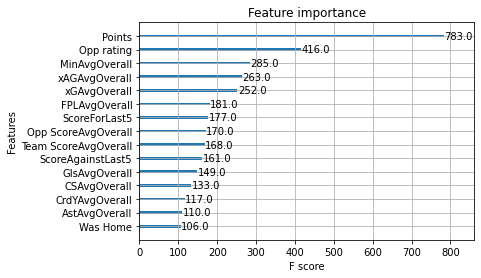

In [44]:
plot_importance(model_fwd)

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


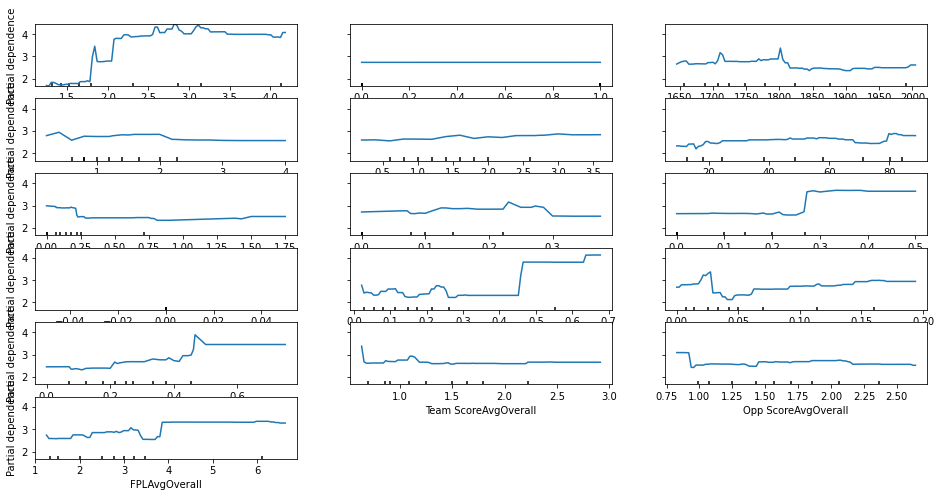

In [45]:
fig, ax = plt.subplots(figsize=(16, 8))
plot_partial_dependence(model_fwd, X_train_fwd, features, ax=ax)

In [46]:
explainer = shap.Explainer(model_fwd, X_train_fwd)
shap_values = explainer(X_train_fwd)

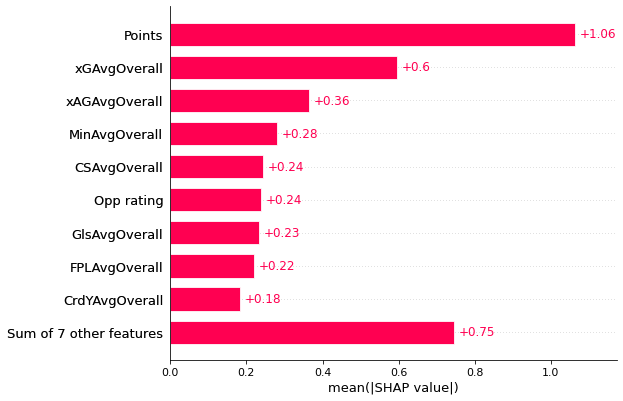

In [47]:
shap.plots.bar(shap_values)

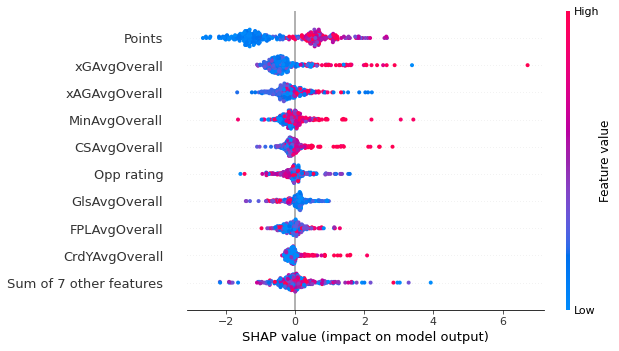

In [48]:
shap.plots.beeswarm(shap_values)

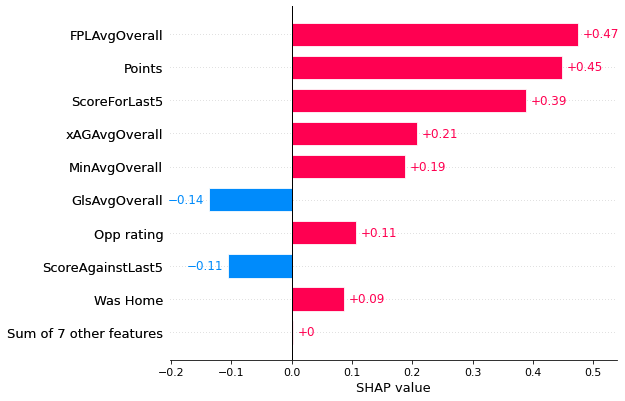

In [49]:
shap.plots.bar(shap_values[0])

# Saving predictions

In [50]:
df_predictions_general.to_csv("predictions/xgb/xgb_predictions_general.csv")

df_predictions_gk.to_csv("predictions/xgb/xgb_predictions_gk.csv")
df_predictions_def.to_csv("predictions/xgb/xgb_predictions_def.csv")
df_predictions_mid.to_csv("predictions/xgb/xgb_predictions_mid.csv")
df_predictions_fwd.to_csv("predictions/xgb/xgb_predictions_fwd.csv")

In [51]:
# merged predictions - mid + fwd
merged_df_predictions = pd.concat([df_predictions_mid, df_predictions_fwd])

merged_df_predictions.to_csv("predictions/xgb/xgb_predictions_merged.csv")

In [52]:
# assembly - all predictions in one df
df_assembly.to_csv("predictions/assembly/xgb_predictions_assembly.csv")